# **Case Técnico - Data Scientist**

---


## Candidato: Bruno Gomes da Silva

Observação: Abaixo tem a versão em inglês e em Português deste notebook.


# **Problem 3: Regression Analysis**
A pharmaceutical company has a new internal policy to not significantly discriminate between salaries based on the location of its employees. They have collected data from all employees and would like you to verify that they are already following the new policy. Before answering the questions below, please take a look at the attached dataset: (1stPhase-SelectiveProcess-Data Science-Data Base.csv).

# A) Describe how you can use the pharmaceutical company data to determine whether employees at different locations have significantly different salaries. (Include here how you will treat the variables before inputting them into the model and any steps you intend to take, going as in-depth as possible in your explanation).

# Answer:
To determine whether there is a significant difference in salaries based on the LOCATION variable (capital or rural), I will use a multiple linear regression approach. Below, I detail all the steps that will be taken:

# 1. Understanding the Problem
The company wants to know whether the new policy aimed at geographic pay equity is being respected. Therefore, the focus is to identify whether the employee's location (LOCATION) significantly influences their salary, controlling for other relevant factors, such as:

*   Position;
*   Position;
*   Education;
*   Age;
*   Tenure with the company.


# 2. Exploratory Data Analysis (EDA)
Before any modeling:

Check the distribution of the MONTHLY_SALARY variable;
*   Item da lista
*   Observe the average salary by LOCATION;
*   Create boxplots and graphs to visualize patterns;
*   Check for outliers and missing values.


# 3. Data Preparation
Treatment of Categorical Variables
The variables EDUCATION, POSITION, and LOCATION are categorical. To include these variables in the linear regression model, I will transform them into dummy variables (one-hot encoding):


*   I will use drop_first=True to avoid the dummy variable trap.
*   The LOCAL_CAPITAL variable will be used as a dummy: if the coefficient of this variable is statistically significant, it will indicate that location influences salary.

*   Standardization/Normalization: This is not strictly necessary for linear regression, but I can check the scale of continuous variables (AGE, TIMEHOUSE) to assess whether there is a significant disparity.

# 4. Statistical Modeling
I will use multiple linear regression with the dependent variable:


*   MONTHLY_SALARY

And the independent variables:
*   AGE, TIME OF HOUSE (numeric)

*   EDUCATION, POSITION, CAPITAL_LOCATION (dummies)

The model will be adjusted with:

Or for more detailed statistical analysis (with p-values).

# 5. Evaluation and Interpretation
After adjusting the model, I will analyze:


*   Coefficient of the LOCAL_CAPITAL variable:
  *   If it is statistically significant (p-value < 0.05), it means there is a significant salary difference between locations.
  *   The sign (positive or negative) will indicate who earns more.

*  R² and adjusted R²: To verify the explanation of the variability.
*  Multicollinearity (VIF): To assess whether there is a correlation between predictors.

# 6. Model-Based Conclusion
If the model indicates that LOCAL is not significant (or the difference is very small), we can conclude that the location-based non-discrimination policy is being followed.

If the LOCAL_CAPITAL variable is significant and the coefficient is significant, this may indicate geographic wage inequality, even controlling for position, age, tenure, and education.

# Summary of Steps

1. EDA: Analyze distribution and means by LOCATION
2. Treatment: Create dummies for categorical variables
3. Modeling: Multiple linear regression with variable control
4. Interpretation: Check the significance and magnitude of the LOCAL_CAPITAL variable
5. Conclusion: Conclude on equity based on the coefficients and p-values

# B) Imagine that, after reviewing the data, you have a meeting with the client where you can show some graphs and ask them comments and/or questions about the data. What visuals would you bring, and what comments/questions would you ask?

# Visual graphs I would bring:

## 1. Boxplot of salary by location
Objective: Visually compare the salary distribution between employees in the capital and the interior.

What it reveals: Differences in median, dispersion, and outliers.

## 2. Bar chart with average salary by position and location
Objective: See if the salary difference between locations persists within the same position (e.g., managers in the capital vs. the interior).
## 3. Histogram or KDE of salary distribution
Objective: Assess whether there is a general trend in salary differences and how salaries are distributed by group.
## 4. Scatterplot: salary vs. age, colored by location
Objective: Explore whether there is a relationship between age and salary in different locations.

## Technical comments to be made in the report

- "We observed an apparent difference in average salaries between locations. The boxplot suggests that employees in the capital (or interior) systematically earn more."

- "When controlling for position and education, we still see a salary difference. This may indicate geographic bias."

- "The regression showed that location has a statistically significant (or insignificant) impact on salary, even after controlling for other variables."

## Strategic Questions for the Client

- "Do the positions in both locations have the same duties and responsibilities?" (There may be differences that justify different salaries even with the same title.)

- "Does the HR policy establish national or regional salary ranges?" (This helps contextualize whether a direct comparison is appropriate.)

- "Are there any additional benefits or local living costs that could influence this result?" (For example, the cost of living in the capital may be higher.)

- "Is this hiring pattern recent or historical?" (There may be a legacy of previous decisions.)

- "Would you like the analysis to be expanded to include other performance or productivity variables?"

## Other pertinent questions as the meeting progresses.

The meeting must balance clear visual evidence with objective comments and strategic questions, demonstrating my technical expertise without taking away the client's leading role in the decision, because the client is always at the center of decisions.

# C) Implement your approach as best you can in Python code, commenting on each step. Don't forget to provide a final conclusion.

In [ ]:
# 1. Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Load the data
df = pd.read_excel("/content/drive/MyDrive/Artefact/1st_Phase_-_Selective_Process_-_Data_Science_-_DataBase.xlsx", sheet_name="Sheet3")

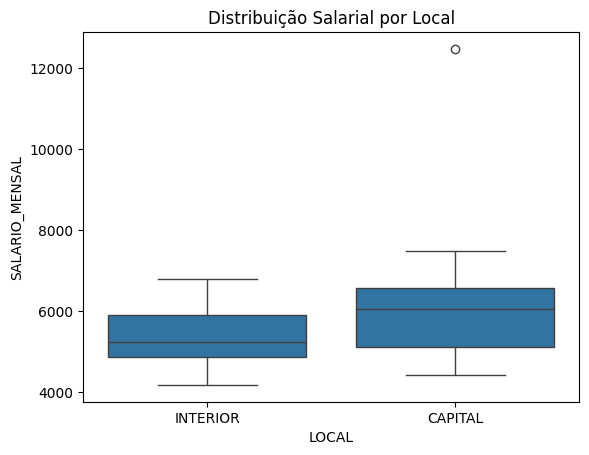

/tmp/ipython-input-5-2463638083.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CARGO', y='SALARIO_MENSAL', hue='LOCAL', data=df, ci=None)


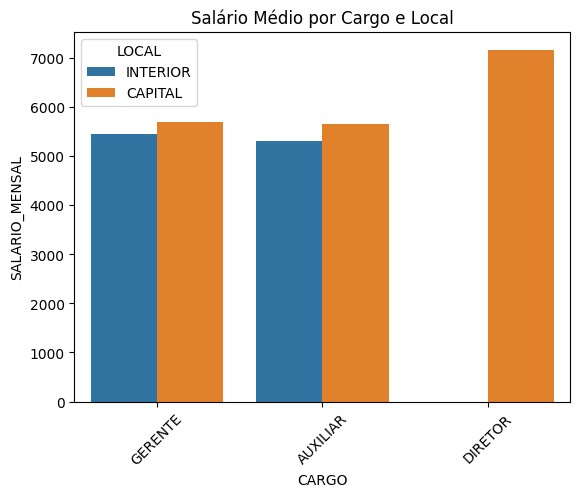

In [ ]:
# 3. Exploratory analysis

sns.boxplot(x='LOCAL', y='SALARIO_MENSAL', data=df)
plt.title("Distribuição Salarial por Local")
plt.show()

sns.barplot(x='CARGO', y='SALARIO_MENSAL', hue='LOCAL', data=df, ci=None)
plt.title("Salário Médio por Cargo e Local")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Data Preparation
# We prepare the data so that the regression works correctly, transforming text into numbers,
# separating the predicted value (salary) from the explanatory factors, and standardizing the formats.

df_model = pd.get_dummies(df, columns=['EDUCAÇÃO', 'CARGO', 'LOCAL'], drop_first=True)
X = df_model.drop(columns=['ID', 'SALARIO_MENSAL'])
y = df_model['SALARIO_MENSAL']
X = sm.add_constant(X)


In [ ]:
# To know what types of variables we have in the dataset.
print(df_model.dtypes)

ID                     int64
IDADE                  int64
TEMPOCASA              int64
SALARIO_MENSAL       float64
EDUCAÇÃO_SUPERIOR       bool
CARGO_DIRETOR           bool
CARGO_GERENTE           bool
LOCAL_INTERIOR          bool
dtype: object


In [ ]:
# Problem: Bool columns (True/False) such as: HIGHER_EDUCATION, DIRECTOR_POSITION, MANAGER_POSITION, and INTERNAL_LOCATION
#Are being interpreted as bool types, and statsmodels.OLS doesn't accept this type — it requires strictly numeric columns (int or float).

X = X.astype(float) # converts everything, including booleans

In [ ]:
# Add constant to the model

X = sm.add_constant(X)

In [ ]:
# Convert everything to float to avoid error with boolean types

X = X.astype(float)
y = y.astype(float)


In [ ]:
# Fit OLS Model
# I used the linear regression model to find out which factors explain employees' salaries.
# It helped me conclude that location isn't unfairly influencing salaries, which is good news for company policy.

# 5. Linear Regression
# Linear regression is a mathematical tool that helps us discover the relationship between these variables and predict salaries.
# It's a way to understand and predict how one thing (like salary) changes when other factors change (like tenure, age, position, etc.).

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         SALARIO_MENSAL   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     20.33
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           7.77e-14
Time:                        20:36:25   Log-Likelihood:                -636.69
No. Observations:                  80   AIC:                             1287.
Df Residuals:                      73   BIC:                             1304.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3631.0433    594.63

# Final Conclusion
The LOCAL_INTERIOR variable is not statistically significant (p-value = 0.408), which indicates that, when controlling for position, age, tenure, and education, there is no evidence that location significantly influences salaries.

Therefore, based on the data and model used, the company appears to be respecting its policy of non-discrimination based on location.

✅ Time at the company and being a director significantly influence salaries.

❌ Location (interior vs. capital) does not have a statistically significant influence.

✅ This indicates that the company is treating salaries fairly across regions, respecting internal policy.

End
Thank you.

Sincerely,

Bruno Gomes da Silva

# **Problema 3: Análise de regressão**

Uma empresa da indústria farmacêutica tem uma nova política interna para não discriminar significativamente os salários de acordo com a localização de seus funcionários. Eles coletaram os dados de todos os funcionários e querem que você verifique se eles já estão seguindo a nova política. Antes de responder às perguntas abaixo, dê uma olhada no conjunto de dados em anexo: (1stPhase-SelectiveProcess-Data Science-Data Base.csv).

# A) Descreva como você pode usar os dados da farmacêutica para verificar se os funcionários de diferentes locais têm salários significativamente diferentes. (Inclua aqui como você tratará as variáveis antes de inseri-las no modelo e todas as etapas que pretende seguir aprofundando o máximo possível em sua explicação).

# Resposta:

Para verificar se há diferença significativa nos salários em função da variável LOCAL (capital ou interior), utilizarei uma abordagem de regressão linear múltipla. A seguir, detalho todas as etapas que serão adotadas:

# 1. Entendimento do Problema

A empresa deseja saber se a nova política que visa equidade salarial geográfica está sendo respeitada. Portanto, o foco é identificar se a localização do funcionário (LOCAL) influencia significativamente o salário, controlando outros fatores relevantes, como:


- Cargo;

- Educação;

- Idade;

- Tempo de empresa.

# 2. Análise Exploratória dos Dados (EDA)

Antes de qualquer modelagem:

- Verificar a distribuição da variável SALARIO_MENSAL;

- Observar a média de salários por LOCAL;

- Criar boxplots e gráficos para visualizar padrões;

- Checar a existência de outliers e valores ausentes.



# 3. Preparação dos Dados

- Tratamento de variáveis categóricas

As variáveis EDUCAÇÃO, CARGO e LOCAL são categóricas. Para incluir essas variáveis no modelo de regressão linear, transformarei em variáveis dummies (one-hot encoding):

- Usarei drop_first=True para evitar a armadilha das variáveis fictícias (dummy variable trap).

- A variável LOCAL_CAPITAL será usada como dummy: se o coeficiente dessa variável for estatisticamente significativo, isso indicará que a localização influencia o salário.

- Padronização/normalização
Não é estritamente necessário para regressão linear, mas posso verificar a escala das variáveis contínuas (IDADE, TEMPOCASA) para avaliar se há grande disparidade.


# 4. Modelagem Estatística

Usarei regressão linear múltipla com a variável dependente:

- SALARIO_MENSAL

E as variáveis independentes:

- IDADE, TEMPOCASA (numéricas)

- EDUCAÇÃO_*, CARGO_*, LOCAL_CAPITAL (dummies)

O modelo será ajustado com:

Ou para análise estatística mais detalhada (com p-valores).

# 5. Avaliação e Interpretação
Após ajustar o modelo, analisarei:

- Coeficiente da variável LOCAL_CAPITAL:

 - Se for estatisticamente significativo (p-valor < 0.05), significa que existe diferença salarial relevante entre locais.

  - O sinal (positivo ou negativo) indicará quem recebe mais.

- R² e R² ajustado: Para verificar a explicação da variabilidade.

- Multicolinearidade (VIF): Para avaliar se há correlação entre preditores.

# 6. Conclusão Baseada no Modelo
Se o modelo indicar que LOCAL não é significativo (ou a diferença é muito pequena), podemos concluir que a política de não-discriminação por localização está sendo seguida.

Se a variável LOCAL_CAPITAL for significativa e o coeficiente expressivo, isso pode indicar desigualdade salarial geográfica, mesmo controlando por cargo, idade, tempo de casa e educação.

# Resumo das Etapas

| Etapa            | Ação                                                            |
| ---------------- | --------------------------------------------------------------- |
| 1. EDA           | Analisar distribuição e médias por LOCAL                        |
| 2. Tratamento    | Criar dummies para variáveis categóricas                        |
| 3. Modelagem     | Regressão linear múltipla com controle de variáveis             |
| 4. Interpretação | Verificar significância e magnitude da variável `LOCAL_CAPITAL` |
| 5. Conclusão     | Concluir sobre equidade com base nos coeficientes e p-valores   |


# B) Imagine que, depois de olhar os dados, você tenha uma reunião com o cliente em que poderá mostrar alguns gráficos e fazer comentários e/ou perguntas para ele sobre os dados. Quais visuais você levaria e quais comentários/perguntas você faria?

**Gráficos (visuais) que eu levaria:**
1. Boxplot do salário por localização
- Objetivo: Comparar visualmente a distribuição dos salários entre funcionários da capital e do interior.

- O que revela: Diferenças de mediana, dispersão, outliers.

2. Gráfico de barras com média salarial por cargo e localização

- Objetivo: Ver se a diferença salarial entre locais persiste dentro do mesmo cargo (ex: gerentes na capital vs no interior).

3. Histograma ou KDE da distribuição salarial

- Objetivo: Avaliar se há tendência geral de diferença salarial, e como os salários se distribuem por grupo.

4. Gráfico de dispersão: salário vs idade, colorido por localização
- Objetivo: Explorar se há relação entre idade e salário em diferentes locais.

**Comentários técnicos a serem feitos na reunião**
- “Observamos uma diferença aparente de salários médios entre localidades. O gráfico de boxplot sugere que funcionários na capital (ou interior) ganham sistematicamente mais.”

- “Ao controlar por cargo e escolaridade, ainda vemos uma diferença salarial. Isso pode indicar um viés geográfico.”

- “A regressão mostrou que a localização tem um impacto estatisticamente significativo (ou não) no salário, mesmo após controlar outras variáveis.”

**Perguntas estratégicas para o cliente**

1. “Os cargos nas duas localidades têm as mesmas atribuições e responsabilidades?”
(Pode haver diferenças que justificam salários diferentes mesmo com o mesmo título.)

2. “A política de RH estabelece faixas salariais nacionais ou regionais?”
(Isso ajuda a contextualizar se a comparação direta é apropriada.)

3. “Existem benefícios extras ou custos de vida locais que podem influenciar esse resultado?”
(Por exemplo, custo de vida na capital pode ser maior.)

4. “Esse padrão de contratação é recente ou histórico?”
(Pode haver legado de decisões anteriores.)

5. “Gostariam que a análise fosse expandida para incluir outras variáveis de performance ou produtividade?”
6. Outras perguntas pertinentes de acordo com o desenrolar da reunião.

A reunião deve equilibrar evidência visual clara com comentários objetivos e perguntas estratégicas, mostrando o meu domínio técnico sem tirar o protagonismo do cliente na decisão porque o cliente sempre está no centro das decisões.



# C) Implemente a sua abordagem da melhor forma possível em um código Python, comentando as etapas do seu código. Não esqueça de trazer uma conclusão final.

In [ ]:
# 1. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Carregar os dados
df = pd.read_excel("/content/drive/MyDrive/Artefact/1st_Phase_-_Selective_Process_-_Data_Science_-_DataBase.xlsx", sheet_name="Sheet3")

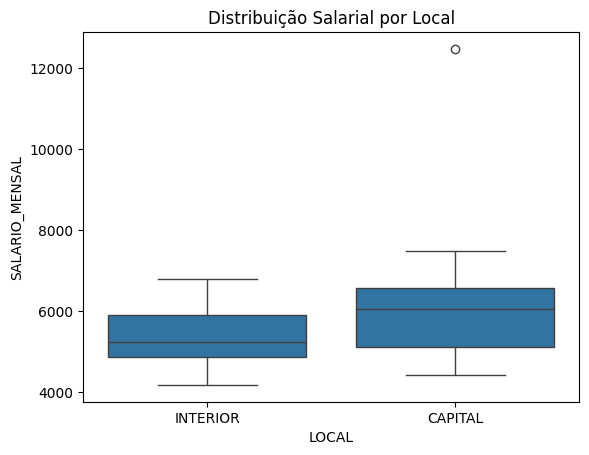

/tmp/ipython-input-4-1612973081.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CARGO', y='SALARIO_MENSAL', hue='LOCAL', data=df, ci=None)


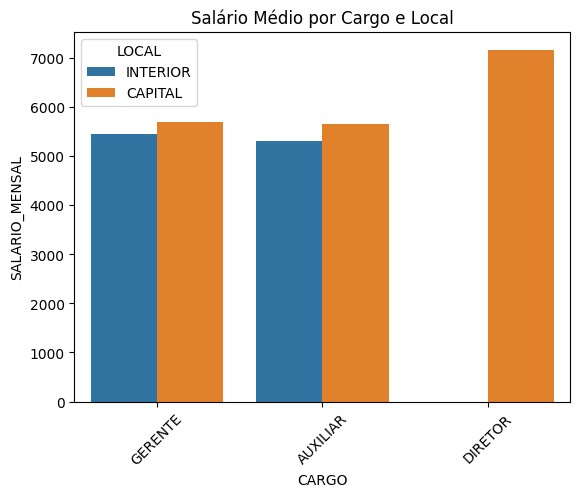

In [ ]:
# 3. Análise exploratória
sns.boxplot(x='LOCAL', y='SALARIO_MENSAL', data=df)
plt.title("Distribuição Salarial por Local")
plt.show()

sns.barplot(x='CARGO', y='SALARIO_MENSAL', hue='LOCAL', data=df, ci=None)
plt.title("Salário Médio por Cargo e Local")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Preparação dos dados
# Preparamos os dados para que a regressão funcione corretamente, transformando textos em números,
#separando o que será previsto (salário) dos fatores explicativos, e padronizando os formatos.

df_model = pd.get_dummies(df, columns=['EDUCAÇÃO', 'CARGO', 'LOCAL'], drop_first=True)
X = df_model.drop(columns=['ID', 'SALARIO_MENSAL'])
y = df_model['SALARIO_MENSAL']
X = sm.add_constant(X)

In [ ]:
print(df_model.dtypes) # Para saber quais tipos de variáveis temos no dataset.


ID                     int64
IDADE                  int64
TEMPOCASA              int64
SALARIO_MENSAL       float64
EDUCAÇÃO_SUPERIOR       bool
CARGO_DIRETOR           bool
CARGO_GERENTE           bool
LOCAL_INTERIOR          bool
dtype: object


In [ ]:
# Problema: As colunas bool (True/False) como: EDUCAÇÃO_SUPERIOR, CARGO_DIRETOR,CARGO_GERENTE e LOCAL_INTERIOR
#Estão sendo interpretadas como tipo bool, e o statsmodels.OLS não aceita esse tipo — ele exige colunas estritamente numéricas (int ou float).

X = X.astype(float)  # converte tudo, incluindo os booleanos


In [ ]:
# Adicionar constante para o modelo

X = sm.add_constant(X)

In [ ]:
# Converter tudo para float para evitar erro com tipos booleanos

X = X.astype(float)
y = y.astype(float)

In [ ]:
# Ajustar modelo OLS
#Usaei o modelo de regressão linear para descobrir quais fatores explicam o salário dos funcionários.
#Ele me ajudou a concluir que a localização não está influenciando o salário de forma injusta, o que é uma boa notícia para a política da empresa.

# 5. Regressão linear
# A regressão linear é uma ferramenta matemática que nos ajuda a descobrir a relação entre essas variáveis e prever o salário.
#E uma forma de entender e prever como uma coisa (como salário) muda quando outras coisas mudam (como tempo de casa, idade, cargo etc.).
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         SALARIO_MENSAL   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     20.33
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           7.77e-14
Time:                        12:29:08   Log-Likelihood:                -636.69
No. Observations:                  80   AIC:                             1287.
Df Residuals:                      73   BIC:                             1304.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3631.0433    594.63

# Conclusão Final
A variável LOCAL_INTERIOR não é estatisticamente significativa (p-valor = 0.408), o que indica que, ao controlar por cargo, idade, tempo de casa e escolaridade, não há evidência de que a localização influencie significativamente os salários.

Portanto, com base nos dados e modelo utilizados, a empresa parece estar respeitando sua política de não-discriminação salarial por localização.

✅ Tempo de empresa e ser diretor influenciam bastante o salário.

❌ Localização (interior vs. capital) não influencia de forma estatisticamente relevante.

✅ Isso indica que a empresa está tratando os salários de forma justa entre regiões, respeitando a política interna.

#Fim

Obrigado.

Atenciosamente,

Bruno Gomes da Silva